In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# sonnet data

poems_df = pd.read_csv("full_sonnet_df.csv")
poems_df = poems_df.drop(poems_df.sample(frac=.7).index)
poems_df = poems_df.drop("Unnamed: 0.1", axis=1)
poems_df.head(3)

,Unnamed: 0,sonnet_index,syllables,s1,s2,s3,s4,s5,s6,s7,...,s9,s10,s11,s12,word_list,sonnet_num,author,polarity,subjectivity,sonnet
0,0,2,10,unstress,stress,unstress,stress,unstress,stress,unstress,...,unstress,stress,missing,missing,"['From', 'fairest', 'creatures', 'we', 'desire...",1,Shakespeare,0.0,0.0,1
9,9,11,10,unstress,stress,unstress,stress,unstress,stress,unstress,...,unstress,stress,missing,missing,"['And', 'only', 'herald', 'to', 'the', 'gaudy'...",1,Shakespeare,0.0,1.0,1
10,10,12,10,unstress,stress,stress,stress,stress,missing,missing,...,unstress,stress,missing,missing,"['Within', 'thine', 'own', 'bud', 'buriest', '...",1,Shakespeare,0.6,1.0,1


In [4]:
# bsb data

bsb_df = pd.read_csv("bsb_IP.csv")
bsb_df["sonnet"] = 0
bsb_df.head(3)

,Unnamed: 0,sonnet_index,syllables,s1,s2,s3,s4,s5,s6,s7,...,s9,s10,s11,s12,word_list,sonnet_num,author,polarity,subjectivity,sonnet
0,0,1,11,stress,stress,stress,stress,unstress,stress,stress,...,stress,stress,stress,missing,"['Once', 'we', 'were', 'lovers', 'Just', 'love...",1,bsb,0.0,0.0,0
1,1,8,11,stress,stress,stress,stress,stress,stress,stress,...,missing,stress,stress,missing,"['But', 'love', 'is', 'all', 'I', 'have', 'to'...",8,bsb,0.5,0.6,0
2,2,21,11,stress,stress,stress,stress,stress,stress,stress,...,missing,stress,stress,missing,"['But', 'love', 'is', 'all', 'I', 'have', 'to'...",21,bsb,0.5,0.6,0


In [5]:
# taylor data

taylor_df = pd.read_csv("taylor_swift_IP.csv")
taylor_df["sonnet"] = 0
taylor_df.head(3)

,Unnamed: 0,sonnet_index,syllables,s1,s2,s3,s4,s5,s6,s7,...,s9,s10,s11,s12,word_list,sonnet_num,author,polarity,subjectivity,sonnet
0,0,1,11,stress,stress,stress,stress,stress,unstress,stress,...,stress,stress,unstress,missing,"['And', 'I', 'was', 'right', 'there', 'beside'...",1,taylor_swift,0.285714,0.535714,0
1,1,22,11,stress,stress,stress,stress,stress,stress,stress,...,unstress,stress,unstress,missing,"['So', 'go', 'and', 'tell', 'your', 'friends',...",22,taylor_swift,0.000000,0.000000,0
2,2,26,11,stress,stress,stress,stress,unstress,stress,stress,...,stress,unstress,stress,missing,"['And', 'if', 'you', 'come', 'around', 'saying...",26,taylor_swift,-0.500000,1.000000,0


In [6]:
# Combining all dataframes above into one

final_df = pd.concat([taylor_df, bsb_df, poems_df])

final_df.head(3)

,Unnamed: 0,sonnet_index,syllables,s1,s2,s3,s4,s5,s6,s7,...,s9,s10,s11,s12,word_list,sonnet_num,author,polarity,subjectivity,sonnet
0,0,1,11,stress,stress,stress,stress,stress,unstress,stress,...,stress,stress,unstress,missing,"['And', 'I', 'was', 'right', 'there', 'beside'...",1,taylor_swift,0.285714,0.535714,0
1,1,22,11,stress,stress,stress,stress,stress,stress,stress,...,unstress,stress,unstress,missing,"['So', 'go', 'and', 'tell', 'your', 'friends',...",22,taylor_swift,0.000000,0.000000,0
2,2,26,11,stress,stress,stress,stress,unstress,stress,stress,...,stress,unstress,stress,missing,"['And', 'if', 'you', 'come', 'around', 'saying...",26,taylor_swift,-0.500000,1.000000,0


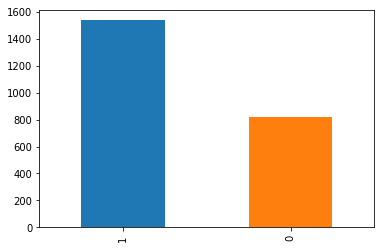

In [7]:
fig, ax = plt.subplots()
final_df['sonnet'].value_counts().plot(ax=ax, kind='bar')

In [158]:
list_of_crosstabs_for_each_predictor = list()

for x in ["syllables","s1","s2","s3","s4","s5","s6","s7","s8","s9","s10","s11","s12","polarity","subjectivity"]:
    crosstab_df = pd.crosstab(final_df["sonnet"], final_df[x], margins=True, margins_name="Total")
    list_of_crosstabs_for_each_predictor.append(crosstab_df)
    
# print(list_of_crosstabs_for_each_predictor)
print(list_of_crosstabs_for_each_predictor[1])
print(list_of_crosstabs_for_each_predictor[2])

s1      missing  stress  unstress  Total
sonnet                                  
0            52     754        13    819
1            55     859       622   1536
Total       107    1613       635   2355
s2      missing  stress  unstress  Total
sonnet                                  
0            33     708        78    819
1            90    1354        92   1536
Total       123    2062       170   2355


In [129]:
# Grab the above cross tab data for the below plots

s1_df = list_of_crosstabs_for_each_predictor[1]
print(s1_df.columns.tolist()) 
print(s1_df['stress'].tolist()) 

s2_df = list_of_crosstabs_for_each_predictor[2]
s3_df = list_of_crosstabs_for_each_predictor[3]
s4_df = list_of_crosstabs_for_each_predictor[4]
s5_df = list_of_crosstabs_for_each_predictor[5]
s6_df = list_of_crosstabs_for_each_predictor[6]
s7_df = list_of_crosstabs_for_each_predictor[7]
s8_df = list_of_crosstabs_for_each_predictor[8]
s9_df = list_of_crosstabs_for_each_predictor[9]
s10_df = list_of_crosstabs_for_each_predictor[10]
s11_df = list_of_crosstabs_for_each_predictor[11]

['missing', 'stress', 'unstress', 'Total']
[754, 859, 1613]


[754, 859]


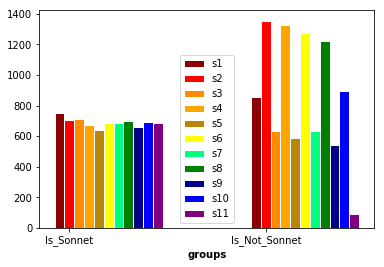

In [159]:
# Making side-by-side bar plot for *stressed* syllables

# set width of bar
barWidth = 0.05

# set heights of the bars
s1_bars = s1_df['stress'].tolist()[0:2]
print(s1_bars)
s2_bars = s2_df['stress'].tolist()[0:2]
s3_bars = s3_df['stress'].tolist()[0:2]
s4_bars = s4_df['stress'].tolist()[0:2]
s5_bars = s5_df['stress'].tolist()[0:2]
s6_bars = s6_df['stress'].tolist()[0:2]
s7_bars = s7_df['stress'].tolist()[0:2]
s8_bars = s8_df['stress'].tolist()[0:2]
s9_bars = s9_df['stress'].tolist()[0:2]
s10_bars = s10_df['stress'].tolist()[0:2]
s11_bars = s11_df['stress'].tolist()[0:2]

# Set position of each bar within a "grouping" on X axis
r1 = np.arange(len(s1_bars))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]
r11 = [x + barWidth for x in r10]

# Make the plot
plt.bar(r1, s1_bars, color='DarkRed', width=barWidth, edgecolor='white', label='s1')
plt.bar(r2, s2_bars, color='Red', width=barWidth, edgecolor='white', label='s2')
plt.bar(r3, s3_bars, color='DarkOrange', width=barWidth, edgecolor='white', label='s3')
plt.bar(r4, s4_bars, color='Orange', width=barWidth, edgecolor='white', label='s4')
plt.bar(r5, s5_bars, color='DarkGoldenRod', width=barWidth, edgecolor='white', label='s5')
plt.bar(r6, s6_bars, color='Yellow', width=barWidth, edgecolor='white', label='s6')
plt.bar(r7, s7_bars, color='SpringGreen', width=barWidth, edgecolor='white', label='s7')
plt.bar(r8, s8_bars, color='Green', width=barWidth, edgecolor='white', label='s8')
plt.bar(r9, s9_bars, color='DarkBlue', width=barWidth, edgecolor='white', label='s9')
plt.bar(r10, s10_bars, color='Blue', width=barWidth, edgecolor='white', label='s10')
plt.bar(r11, s11_bars, color='Purple', width=barWidth, edgecolor='white', label='s11')

# Add xticks on the middle of the group bars
plt.xlabel('groups', fontweight='bold')
plt.xticks([r + barWidth for r in range(2)], ['Is_Sonnet','Is_Not_Sonnet'])

# Create legend & Show graphic
plt.legend()
plt.show()